In [1]:
%matplotlib notebook 
import pandas as pd
import quandl
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

In [12]:
df = pd.read_csv('covid-variants.csv')
variants = set(df['variant'].values)
print(variants)
df

{'B.1.367', 'Gamma', 'B.1.1.277', 'Omicron', 'Alpha', 'B.1.160', 'Epsilon', 'Lambda', 'B.1.221', 'Eta', 'S:677H.Robin1', 'Kappa', 'non_who', 'B.1.258', 'Mu', 'B.1.1.302', 'B.1.1.519', 'B.1.620', 'others', 'Iota', 'Delta', 'S:677P.Pelican', 'B.1.177', 'Beta'}


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [24]:
filt_omicron = (df['variant'] == 'Omicron')
df_omicron = df[filt_omicron]
df_omicron.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
19,Angola,2020-07-06,Omicron,0,0.0,3
43,Angola,2020-08-31,Omicron,0,0.0,1
67,Angola,2020-09-28,Omicron,0,0.0,10
91,Angola,2020-10-12,Omicron,0,0.0,29
115,Angola,2020-10-26,Omicron,0,0.0,7


In [31]:
df_us = df_omicron.copy()[df['location'] == 'Argentina']
df_us.head()

C:\Users\Emilio\AppData\Local\Temp/ipykernel_3508/2228849859.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_us = df_omicron.copy()[df['location'] == 'Argentina']


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
691,Argentina,2020-05-11,Omicron,0,0.0,151
715,Argentina,2020-05-25,Omicron,0,0.0,167
739,Argentina,2020-06-08,Omicron,0,0.0,67
763,Argentina,2020-06-22,Omicron,0,0.0,79
787,Argentina,2020-07-06,Omicron,0,0.0,63


In [38]:
countries = df['location'].unique()

121

C:\Users\Emilio\AppData\Local\Temp/ipykernel_3508/3175611685.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cant = df_omicron[df['location'] == countries[country]]['num_sequences_total'].sum()


<IPython.core.display.Javascript object>


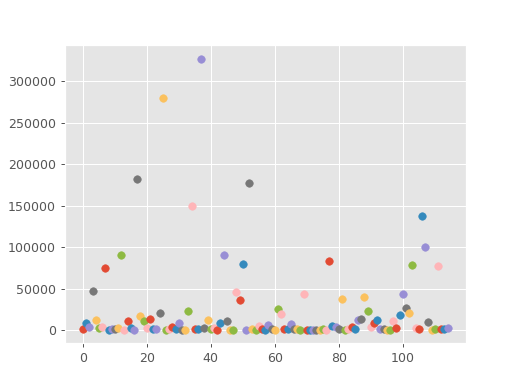

IndexError: list index out of range

In [68]:
amount = []
labels = []
for country in range(len(countries)):
    cant = df_omicron[df['location'] == countries[country]]['num_sequences_total'].sum()
    if cant < 1000000:
        amount.append(cant)
        plt.scatter(country, amount[country])
        labels.append(countries[country])
print(amount)
plt.legend(loc = 'best')
plt.show()

In [61]:
plt.plot(df_us['date'],df_us['num_sequences_total'])
plt.title('Omicron Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()